# 📌 01 – Data Exploration (CSIC 2010 Dataset)

“This notebook provides an initial exploration of the raw CSIC 2010 HTTP dataset, inspecting the structure, request patterns, and data quality before preprocessing.”


*– Imports*

In [8]:

import sys
import os

# Add src/ to path (to access build_features, parsers, etc.)
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")



 *– Inspect raw CSIC 2010 files :*

In [9]:

DATA_PATH = "../data/csic_2010/"

files = os.listdir(DATA_PATH)
files


['anomalousTrafficTest.txt',
 'dataset_cisc_train_test.tar.gz',
 'normalTrafficTest.txt',
 'normalTrafficTraining.txt']

*— Preview first 50 lines of the raw training file:*

In [10]:

with open(os.path.join(DATA_PATH, "normalTrafficTraining.txt"), "r", encoding="latin-1") as f:
    preview = f.readlines()[:50]

print("".join(preview))


GET http://localhost:8080/tienda1/index.jsp HTTP/1.1
User-Agent: Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)
Pragma: no-cache
Cache-control: no-cache
Accept: text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5
Accept-Encoding: x-gzip, x-deflate, gzip, deflate
Accept-Charset: utf-8, utf-8;q=0.5, *;q=0.5
Accept-Language: en
Host: localhost:8080
Cookie: JSESSIONID=1F767F17239C9B670A39E9B10C3825F4
Connection: close


GET http://localhost:8080/tienda1/publico/anadir.jsp?id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito HTTP/1.1
User-Agent: Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.8 (like Gecko)
Pragma: no-cache
Cache-control: no-cache
Accept: text/xml,application/xml,application/xhtml+xml,text/html;q=0.9,text/plain;q=0.8,image/png,*/*;q=0.5
Accept-Encoding: x-gzip, x-deflate, gzip, deflate
Accept-Charset: utf-8, utf-8;q=0.5, *;q=0.5
Accept-Language: en
Host: localhost:8080
Cookie: 

*— Count request blocks :*

In [11]:

with open(os.path.join(DATA_PATH, "normalTrafficTraining.txt"), "r", encoding="latin-1") as f:
    text = f.read()

num_blocks = len(text.split("\n\n"))
num_blocks


44001

*— Load parsed CSV produced by parse_logs.py:*

In [12]:

df = pd.read_csv("../data/csic_database.csv")
df.head()


,method,url,protocol,host,user_agent,cookie,content_type,content_length,body,label
0,GET,http://localhost:8080/tienda1/index.jsp,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,NaN,NaN,0
1,GET,http://localhost:8080/tienda1/publico/anadir.j...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,NaN,NaN,0
2,POST,http://localhost:8080/tienda1/publico/anadir.jsp,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,68.0,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,GET,http://localhost:8080/tienda1/publico/autentic...,HTTP/1.1,localhost:8080,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,NaN,NaN,0


*— Dataset overview:*

In [13]:

df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123042 entries, 0 to 123041
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   method          97065 non-null   object 
 1   url             97065 non-null   object 
 2   protocol        97065 non-null   object 
 3   host            97065 non-null   object 
 4   user_agent      97065 non-null   object 
 5   cookie          97065 non-null   object 
 6   content_type    25977 non-null   object 
 7   content_length  25977 non-null   float64
 8   body            0 non-null       float64
 9   label           123042 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 9.4+ MB


method             25977
url                25977
protocol           25977
host               25977
user_agent         25977
cookie             25977
content_type       97065
content_length     97065
body              123042
label                  0
dtype: int64

*— Distribution of HTTP methods:*

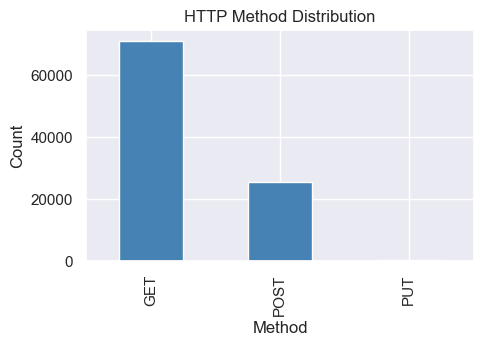

In [14]:
plt.figure(figsize=(5,3))
df["method"].value_counts().plot(kind="bar", color="steelblue")
plt.title("HTTP Method Distribution")
plt.xlabel("Method")
plt.ylabel("Count")
plt.show()